In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
from IPython.display import HTML

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
visuals_basepath = '/kaggle/input/visuals/'

In [ ]:
cb_performance_table = pd.read_csv(os.path.join(visuals_basepath,'CB Performance Evaluation.csv'),index_col=0)
man_coverage_performance = pd.read_csv(os.path.join(visuals_basepath,'man coverage performance.csv'),index_col=0)
man_iso_coverage_performance = pd.read_csv(os.path.join(visuals_basepath,'man iso coverage performance.csv'),index_col=0)

# Overview
### The goal of this analysis was to identify the coverage strategies employed at the team and individual level and then evaluate the resulting performance of those coverages.

### Approach
Coverages were first identified at the individual player level. Man and Zone coverage were identified based on the initial line-up of defenders relative to receivers and the correlation between their movements throughout the play. Defenders who lined up directly over a receiver and had correlated movements with that 'locked' player were identified as being in man coverage. Defenders who did not line up over an opposing receiver, were lined up well off the line of scrimmage at the start of the play (7.5+ yds), or had uncorrelated movements with the player they lined up over were consided in zone coverage. Blitzing players were also identified as players moving to positions behind the line of scrimmage and towards the opposing QB. 

The coverages of the individual defensive players were then aggregated to assess team-level coverages and evaluate the performance of those schemes. For this analysis, the coverage scheme (cover 2 vs cover 4, etc), the personal package (standard vs nickel, etc), and the coverage of the individual defender targeted by the offense were assessed for performance. Performance was assessed by summing the total EPA (expected points added) for each play with a forward pass that occured under the specific condition (coverage scheme, personnel package, etc). The total EPA for that condition was then divided by the total number of plays for that condition to calculate the 'EPA rate' or the expected points added by the opposing offense for each play under that coverage condition. A negative rate indicates that the defensive coverage reduces the amount of points the offense is expected to score while a positive value indicates the expected points the offense is adding per play.

# Team - Pass Coverage Performance


## Team Coverage Performance by Coverage Scheme
All plays defended by the defense were sorted and assessed by the coverage scheme employed. This assessment helps clarrify the coverage tendencies of the defense and the effectiveness of those schemes. This can be valuable for defensive coaching staffs as it shows what coverage schemes are working an how often a scheme is employed. For example, there may be a disconnect between the team's most effective scheme (or least effective) and the percentage of plays that it is employed. Additionally this information can be used for scouting by offensive sides to better understand the coverage schemes they will likely face and in what situations the defense is more vulnerable. 

The coverage tendencies and performance for Chicago, the top defense in 2018 by total EPA, is shown below.

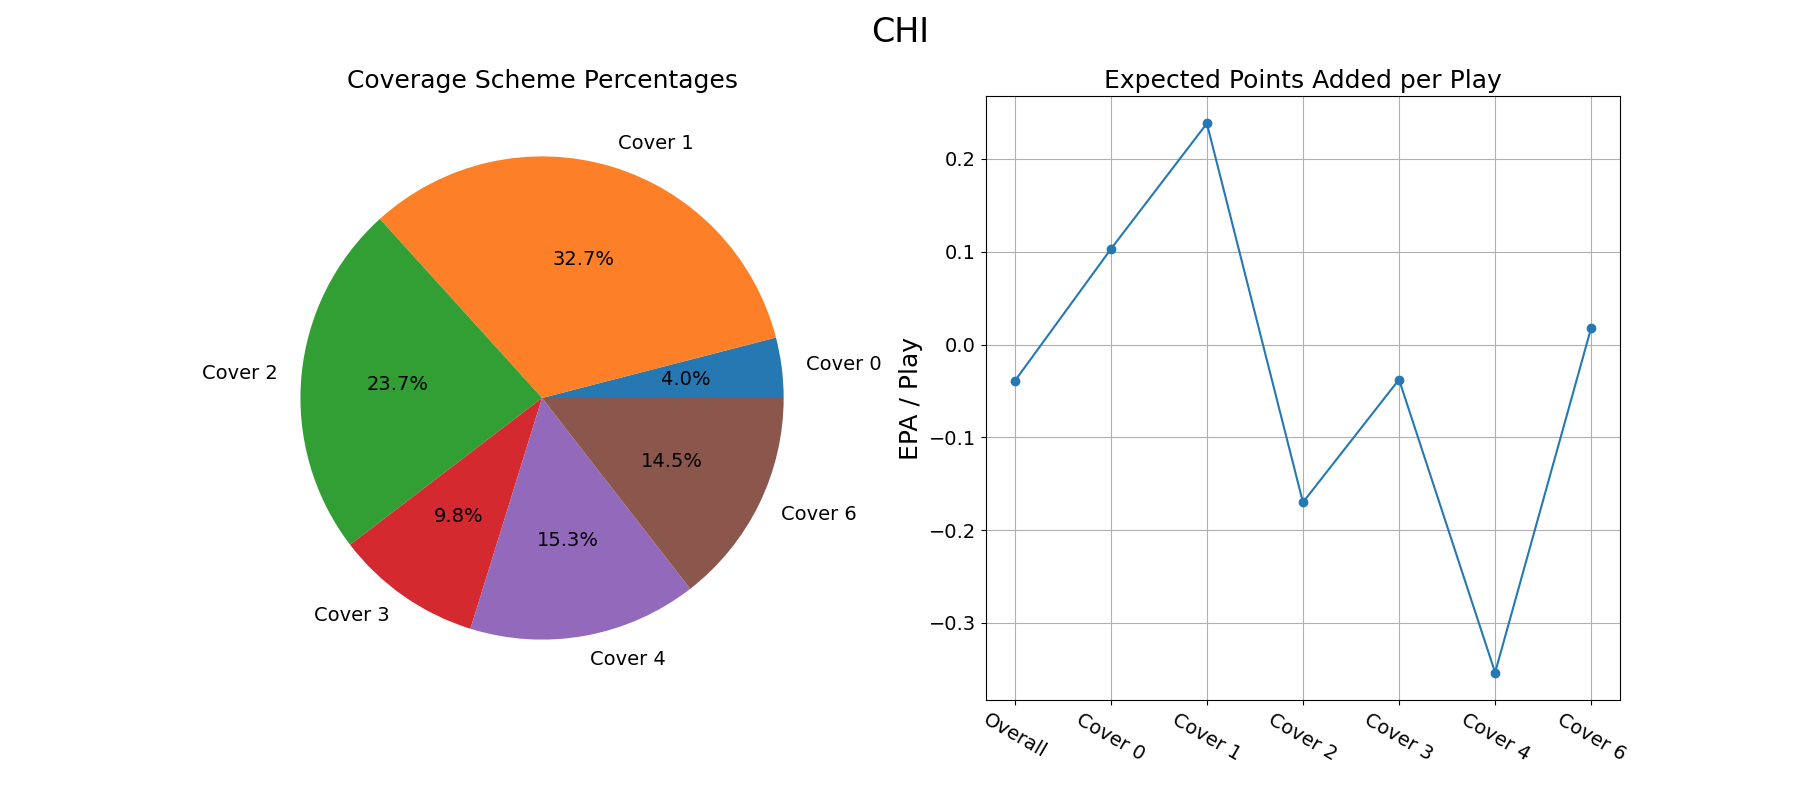

## Team Coverage Performance by Personnel Package
Defenses were evaluated using the same methods as above to evaluate frequencey and performance of different personnel packages employed. This again serves as opportunity for defenses to evaluate their past performance and personnel usage rights while giving opposing offenses scouting information to attempt to exploit weaknesses.

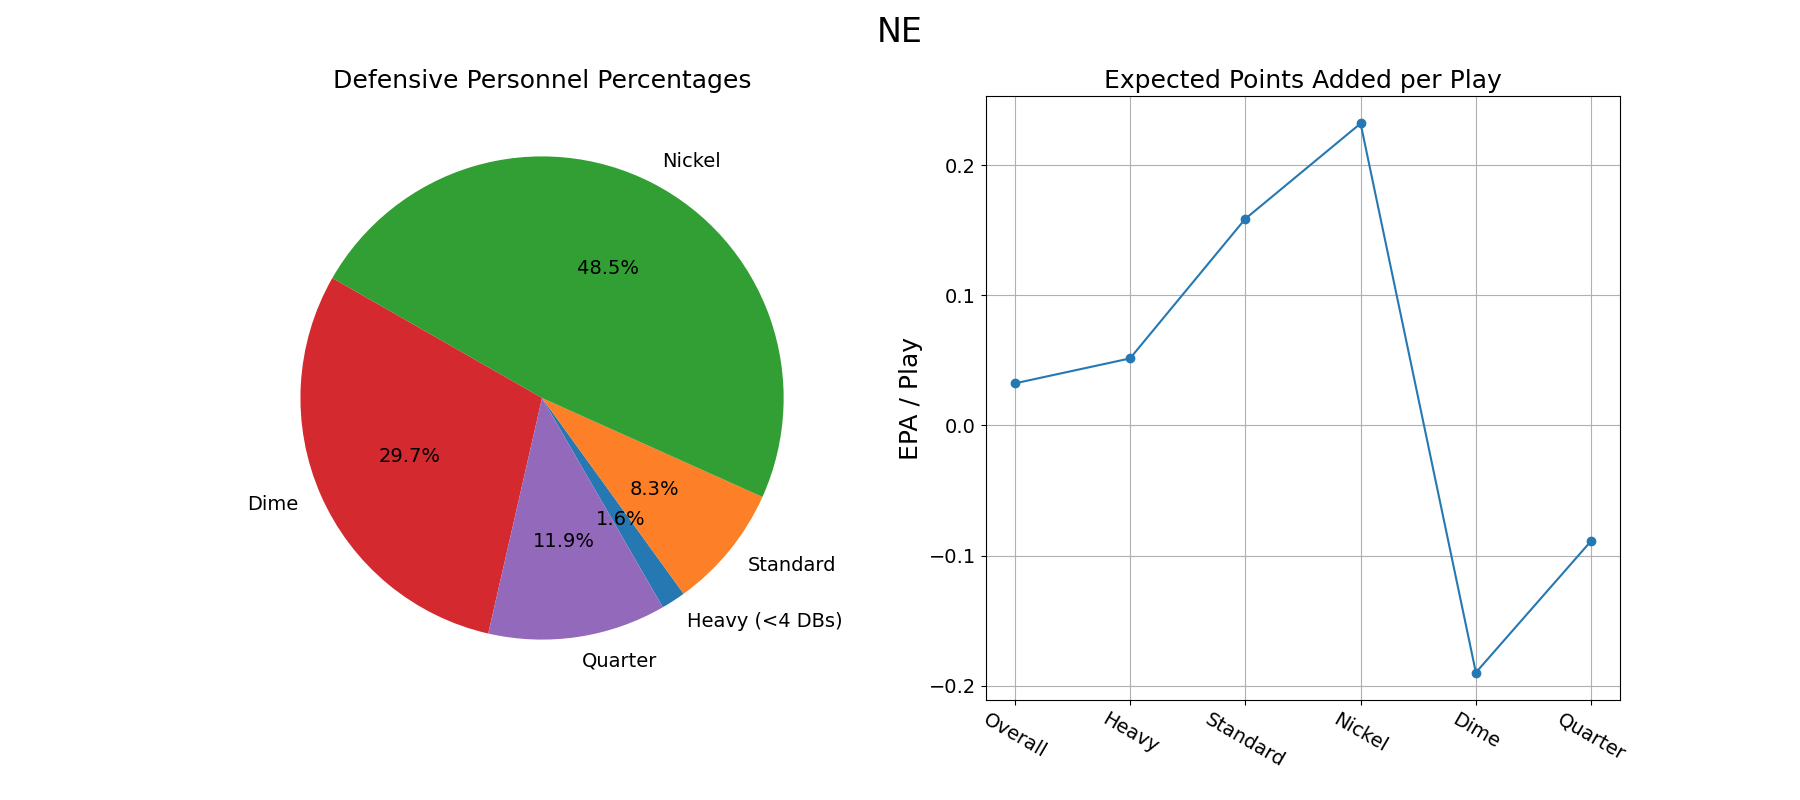

## Team Coverage Performance by Targeted Coverage
There are two interesting nuances of coverage schemes should additional be considered:
* Many of the common coverage schemes (such as cover 2) are a combination of man and zone coverage.
* There is the concept of 'beating a coverage' or 'finding a hole in the zone'

Given those considerations, team defense was also evaluated based on the coverage of the player targeted by the offense. Additionally this provides the opportunity to evaluate the outcomes of plays where the receiver was unguarded or found a gap in the zone coverage. Checkdown plays were also evaluated and defined as passes to a receiver (often a running back) behind the line of scrimmage. Interestingly there was a wide range in team performance in both cases with some teams finishing with a negative EPA per play in both cases, indicating they were effective in defending these cases, while other teams were highly vulnerable, especially in the no-coverage situation. Potential explanations for this variation could be team defensive approach to allow underneath routes but contain down-field attempts, coverage defenders that are exceptional at closing distance on zone routes, and linebackers or other defensive backs that are excellent at defending passes to receivers out of the backfield. These considerations are beyond the scope of this analysis but justify future investigation.  

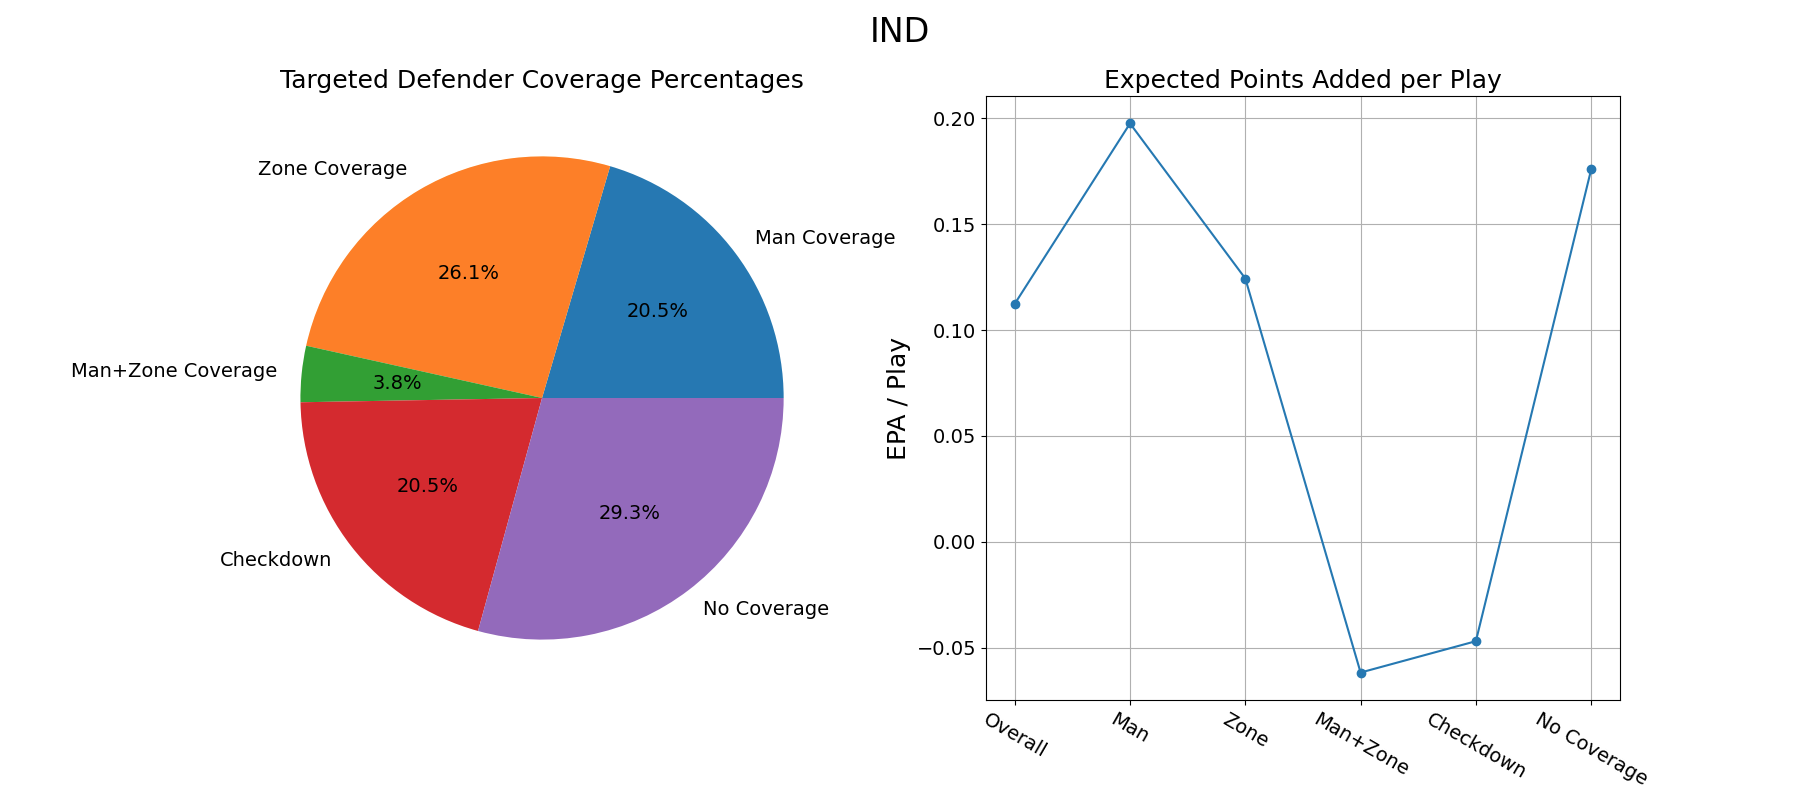

### No Coverage Example - "Splitting the Seam"

Below is an example of a play (Week 1: IND vs CIN) that was categorized as 'no coverage' due to the receiver being outside of any zone coverages when the pass was thrown. This is an example of the slot receiver 'splitting the seam' between two the deep safeties, resulting in a touchdown. Traditionally this play could be blamed on the strong-side safety for not getting over to the reciever in time, however based on their position at the time of the pass, which could be due to responsibilities to provide outside over-the-top help, the analytical approached determined that the play call and receivers route actually 'beat' the defense's coverage rather than an individual player.

<img src="https://media.giphy.com/media/XEAaIL3GoHTpXvoS7g/giphy.gif">

# Individual - Pass Coverage Performance
The second part of this analysis is focused on evaluation individual defenders in their ability to defend the pass under man and zone coverage situations. 

This analysis was limited to cornerbacks in order to keep the presentation of data in a more maneagable scope and to compare apples-to-apples of players at the same position. 

##### Cornerback -  Pass Coverage Performance Evaluation
The primary evaluation metric employed was the 'delta epa rate' for a defender. The 'delta epa rate' was defined as the difference between the EPA of play and the receiver's average EPA per target (expected EPA), then divided by the total number of targets defended.

### Delta EPA Rate = Σ((defended play EPA) - (target receiver expected EPA/target)) / (total defended targets)

The 'delta epa rate' was calculated separately for:
* All the plays the cornerback was targeted
* Plays the cornerback was targeted in man coverage
* Plays the cornerback was targeted in zone coverage

These rates were then scored against all qualifying cornerbacks on a [20-80 scale](http://m.mlb.com/glossary/miscellaneous/scouting-grades) where the mean rate for the group is a score of 50 and each 10 points above or below relates to 1 standard deviation. Therefor players with a score of 80 would be "elite" as performing 3 standard deviations above the mean performance level of the group.

The secondary evalation metric that was considered was the % of snaps a player was targeted. Intuitively better cornerbacks are likely targeted less often than weaker defenders. The target percentage was also calculated for all plays, man coverage, and zone coverage. These percentages were then also scored on the 20-80 scale to normalize the metric values.

The combination of the coverage score, evaluating a player's ability to reduce the covered receiver's expected production, and the rate at which the cornerback is target by the opposing team, gives a compelling look at the effective performance of the defender as an individual.

Below is the top 15 qualifying cornerbacks sorted by their 'Total Coverage Score' or the overall assessment of thier ability to reduce the opposing receiver's production. The inclusion criteria was a minimum of 200 snaps played over the season.

In [ ]:
cb_performance_table

## Cornerback - Man Coverage Performance Evaluation
One of the challenges of building a football roster is to fit individual players into a collective scheme. As part of this, players are sometimes required to play specific coverages or have certain responsibilities a large portion of the time. When building a roster and defensive unit, it is important for players to be good fits for the role they are asked to fill. For this reason, there is value in a deeper assessment of player performance in specific situations in order to identify the right personnel for the role or make defensive adjustments as necessary to better fit the personnel available. 

Below man coverage is assessed with two additional fields added for additional depth of analysis. Cornerbacks with at least 100+ snaps in man coverage were included in the analysis with the top 10 and bottom 10 players sorted by their 'Man Coverage Score' displayed below. 

'Man Coverage Score' and 'Man Target % Score' were both re-scored for only the subset of players included in the man-specific analysis. In additon to these fields, two other performance characteristics where considered: The percent of plays where the defender had over-the-top safety help and the sum of the expected EPA / snap for receivers the defender covered but where not thrown to. Like the other metrics, these parameters waere scored against the group. A defender that consistently covers top receivers that are not thrown to would have a high score for the non-targeted EPA metric.

These two additional parameter were considered important because:
* The ability for the defender to be effective in isolated coverage situation in some schemes is very important
* A large value of elite defenders may come from not being targeted at all

Particularly in regard to the percent of snaps with safety help, putting a defender that is highly effective in man coverage while relying on safety help (potentially due to aggressive coverage tendencies) could be significally less effective when required to operate in an isolated situation where they have to manage greater risk. This idea is explored more below.

In [ ]:
man_coverage_performance

## Cornerback - Isolated Man Coverage Performance Evaluation
If we evaluate the performance of cornerbacks in man-coverage situations, a logical next step is to assess their performance in isolated man-coverage situations when they have no over-the-top safety help. A cornerback with the ability to effectively cover receivers without safety help frees up this additional defender and gives the defense greater flexibity to leverage that player in other locations.

In this case, receivers are scored only on their 'delta EPA rate' (expected receiver production reduction) for plays when they are in isolated man coverage. Players were required to have a at least 100+ snaps in isolated man coverage to be considered. Below is the top 10 and bottom 10 of qualifying cornerbacks sorted by their Isolated Man Coverage Score.

Again, it was deemed important to consider the EPA reduction that occurs from the densive back not being targeted at all. As was done above for the Man Coverage Anlysis, the 'expected EPA / snap' for the covered receiver every time they were not targeted was summed and scored relative to the group. 

In [ ]:
man_iso_coverage_performance

# Conclusions
This analysis investigated the performance of defensive units utilizing different coverage schemes and personnel packages, as well as, the individual performance of defensive backs to reduce offensive receivers' expected production. This information can be utilized by coaches and front office executives on both the offensive and defensive sides of the ball to make informed scouting assessment, game plans, and personnel decisions.

## Limitations And Future Work

#### Team Analysis

The primary limitation for the team analysis was not normalizing for opponent offensive production. This was omited due to time constraints and should be included in future analysis to better account for strength of opponents played.

#### Individual Analysis

A limiation for the individual analysis was standardizating the size of the zone range for all player by position. The zone radius values were set to 3yds for linebackers, 5yds for cornerbacks, and 7yds for safeties. This approach had the benefit of standardizing the coverage responsibility for all players but reduced the ability to capture effects of individual player coverage range or account for distance from the line of scrimmage that could give the defender more time to cover distance. Future investigation should consider this parameter, assess defenders' ability to close distance, and incorperate those considerations into the player assessment.

## Appendix

#### Author: [@j_howenstein](https://twitter.com/j_howenstein)
#### Project Code: [github](https://github.com/jhowenstein/nfl-big-data)